In [77]:
#https://www.geeksforgeeks.org/stock-price-prediction-project-using-tensorflow/ This is shamlessly inspired(copied) from this model 
#and no, this didnt work at all. 
import pandas as 
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import os
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")


In [78]:
from jugaad_data.nse import index_raw
from jugaad_data.nse import stock_df
from jugaad_data.nse import NSELive
n = NSELive()
q = n.stock_quote("KSCL")
print(q['priceInfo'])

{'lastPrice': 662.55, 'change': 0, 'pChange': 0, 'previousClose': 662.55, 'open': 666.05, 'close': 663.25, 'vwap': 665.19, 'lowerCP': '530.05', 'upperCP': '795.05', 'pPriceBand': '20', 'basePrice': 662.55, 'intraDayHighLow': {'min': 658.8, 'max': 670.8, 'value': 662.55}, 'weekHighLow': {'min': 466.5, 'minDate': '31-Mar-2023', 'max': 692, 'maxDate': '19-Oct-2023', 'value': 662.55}, 'iNavValue': None, 'checkINAV': False}


In [79]:
from jugaad_data.nse import stock_df
agri_data_df = stock_df(symbol='KSCL', 
                                from_date=datetime(2011,1,1), 
                                to_date=datetime(2024,1,5), 
                                series="EQ")


In [80]:
agri_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3235 entries, 0 to 3234
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATE          3235 non-null   datetime64[ns]
 1   SERIES        3235 non-null   object        
 2   OPEN          3235 non-null   float64       
 3   HIGH          3235 non-null   float64       
 4   LOW           3235 non-null   float64       
 5   PREV. CLOSE   3235 non-null   float64       
 6   LTP           3235 non-null   float64       
 7   CLOSE         3235 non-null   float64       
 8   VWAP          3235 non-null   float64       
 9   52W H         3235 non-null   float64       
 10  52W L         3235 non-null   float64       
 11  VOLUME        3235 non-null   int64         
 12  VALUE         3235 non-null   float64       
 13  NO OF TRADES  3235 non-null   int64         
 14  SYMBOL        3235 non-null   object        
dtypes: datetime64[ns](1), float64(10), int

In [81]:
agri_data_df['DATE'] = pd.to_numeric(pd.to_datetime(agri_data_df['DATE']))
agri_data_df=agri_data_df.drop(['SYMBOL'],axis=1)

In [82]:
agri_data_df=agri_data_df.drop(['SERIES'],axis=1)

In [83]:
agri_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3235 entries, 0 to 3234
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATE          3235 non-null   int64  
 1   OPEN          3235 non-null   float64
 2   HIGH          3235 non-null   float64
 3   LOW           3235 non-null   float64
 4   PREV. CLOSE   3235 non-null   float64
 5   LTP           3235 non-null   float64
 6   CLOSE         3235 non-null   float64
 7   VWAP          3235 non-null   float64
 8   52W H         3235 non-null   float64
 9   52W L         3235 non-null   float64
 10  VOLUME        3235 non-null   int64  
 11  VALUE         3235 non-null   float64
 12  NO OF TRADES  3235 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 328.7 KB


In [93]:
training = int(np.ceil(len(agri_data_df) * .95))
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
train_data = scaled_data[0:int(training), :]
# prepare feature and labels
x_train = []
y_train = []
 
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
 
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [94]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64,
                            return_sequences=True,
                            input_shape=(x_train.shape[1], 1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(32))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 60, 64)            16896     
                                                                 
 lstm_7 (LSTM)               (None, 64)                33024     
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 52033 (203.25 KB)
Trainable params: 52033 (203.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [95]:
model.compile(optimizer='adam',
              loss='mean_squared_error')
history = model.fit(x_train,
                    y_train,
                    epochs=10)


Epoch 1/10
95/95 [==============================] - 9s 62ms/step - loss: 0.0091
Epoch 2/10
95/95 [==============================] - 6s 63ms/step - loss: 0.0043
Epoch 3/10
95/95 [==============================] - 6s 62ms/step - loss: 0.0031
Epoch 4/10
95/95 [==============================] - 6s 62ms/step - loss: 0.0030
Epoch 5/10
95/95 [==============================] - 6s 62ms/step - loss: 0.0029
Epoch 6/10
95/95 [==============================] - 6s 62ms/step - loss: 0.0026
Epoch 7/10
95/95 [==============================] - 6s 62ms/step - loss: 0.0023
Epoch 8/10
95/95 [==============================] - 6s 62ms/step - loss: 0.0026
Epoch 9/10
95/95 [==============================] - 6s 62ms/step - loss: 0.0022
Epoch 10/10
95/95 [==============================] - 6s 62ms/step - loss: 0.0019


In [96]:
close_data = agri_data_df.filter(['CLOSE'])
dataset = close_data.values
test_data = scaled_data[training - 60:, :]
x_test = []
y_test = dataset[training:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
 
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
 
# predict the testing data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
 
# evaluation metrics
mse = np.mean(((predictions - y_test) ** 2))
print("MSE", mse)
print("RMSE", np.sqrt(mse))


6/6 [==============================] - 1s 26ms/step
MSE 238.3129296577488
RMSE 15.437387397411158


In [98]:
train = agri_data_df[:training]
test = agri_data_df[training:]
test['Predictions'] = predictions

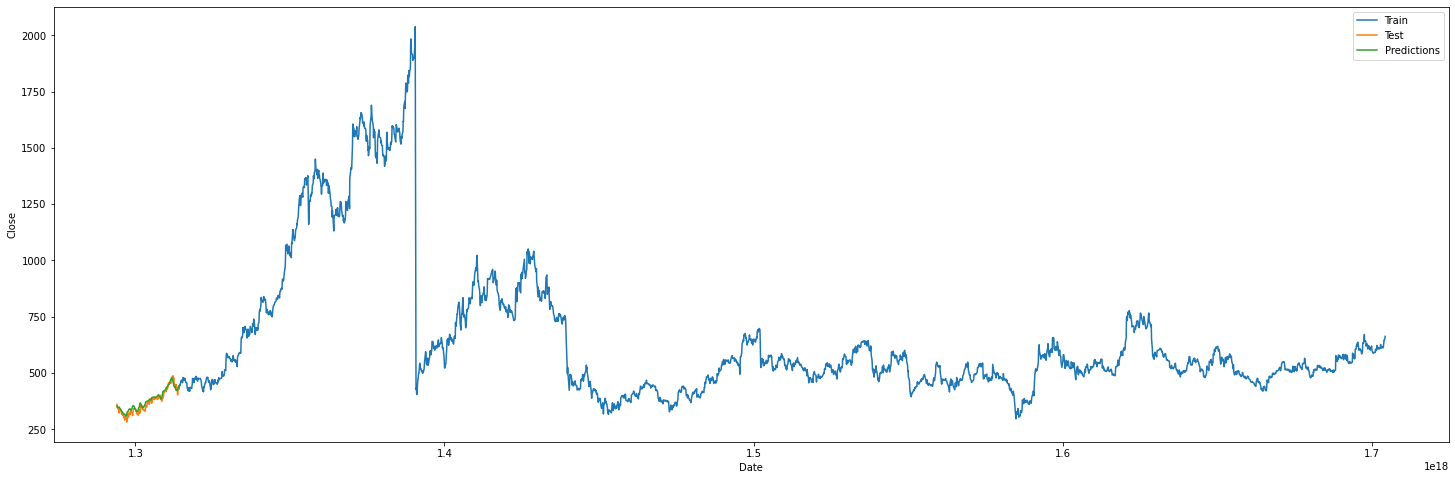

In [106]:
plt.figure(figsize=(25, 8))
plt.plot(train['DATE'], train['CLOSE'])
plt.plot(test['DATE'], test[['CLOSE', 'Predictions']])
plt.xlabel('Date')
plt.ylabel("Close")
plt.legend(['Train', 'Test', 'Predictions'])